# Data Loading and Exploration 

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load the dataset
file_path = '/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx'
df = pd.read_excel(file_path)

df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [42]:
# Check the structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Get summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


# Data Preprocessing

In [43]:
# Drop unnecessary columns
columns_to_drop = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Score', 'CLTV', 'Churn Reason']
df.drop(columns=columns_to_drop, inplace=True)

# Convert `Total Charges` to numeric to handle possible errors
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Handle missing values (for Total Charges; fill with the mean)
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].mean())

# Convert categorical `Yes/No` columns to 1/0
yes_no_columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Churn Label']
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


# Feature Engineering 

In [44]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering - Transformations and Interactions
df['Tenure Category'] = pd.cut(df['Tenure Months'], bins=[0, 12, 24, 48, 72], labels=['0-1 year', '1-2 years', '2-4 years', '4-6 years'])

# Ensure no negative or zero values before applying log transformations
df['Total Charges'] = df['Total Charges'].apply(lambda x: x if x > 0 else 1e-5)
df['Monthly Charges'] = df['Monthly Charges'].apply(lambda x: x if x > 0 else 1e-5)

# Log transformation of Total and Monthly Charges
df['Log Total Charges'] = np.log1p(df['Total Charges'])
df['Log Monthly Charges'] = np.log1p(df['Monthly Charges'])

# Interaction Features
df['Contract_Monthly_Interaction'] = df['Contract'] + '_' + pd.qcut(df['Monthly Charges'], 4).astype(str)
df['Internet_Streaming'] = df['Internet Service'] + '_' + df['Streaming TV'].astype(str)

# Handling missing values by filling with 0
df[['Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']] = df[['Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']].fillna(0)

# Convert categorical columns into one-hot encoding
df = pd.get_dummies(df, columns=['Contract', 'Payment Method', 'Internet Service'], drop_first=True)

# Scale the numeric features
scaler = StandardScaler()
df[['Monthly Charges', 'Total Charges', 'Tenure Months']] = scaler.fit_transform(df[['Monthly Charges', 'Total Charges', 'Tenure Months']])

# Check the cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Gender                                  7043 non-null   object  
 1   Senior Citizen                          7043 non-null   int64   
 2   Partner                                 7043 non-null   int64   
 3   Dependents                              7043 non-null   int64   
 4   Tenure Months                           7043 non-null   float64 
 5   Phone Service                           7043 non-null   int64   
 6   Multiple Lines                          7043 non-null   float64 
 7   Online Security                         7043 non-null   float64 
 8   Online Backup                           7043 non-null   float64 
 9   Device Protection                       7043 non-null   float64 
 10  Tech Support                            7043 non

# Exploratory Data Analysis

In [45]:
# Set up color palettes for visuals
sns.set_palette("bright")

**Target Variable Distribution**


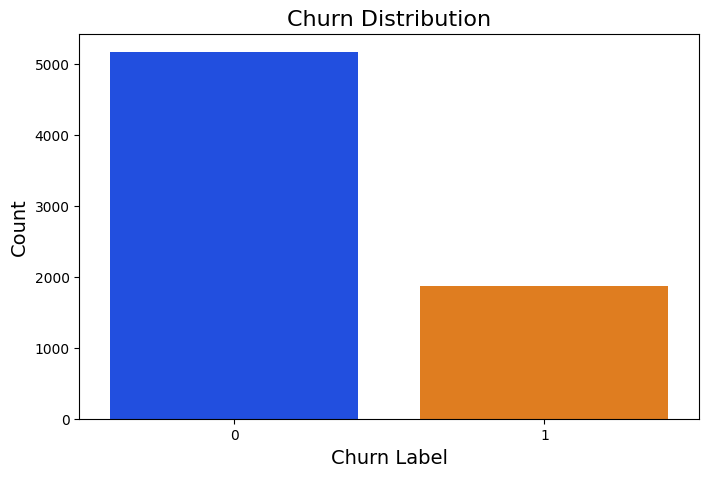

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label', data=df, palette='bright')
plt.title('Churn Distribution', fontsize=16)
plt.xlabel('Churn Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


**Churn Distribution:** The plot shows that the dataset is imbalanced, with significantly more non-churned customers (label 0) than churned customers (label 1).

**Categorical Features Distribution**

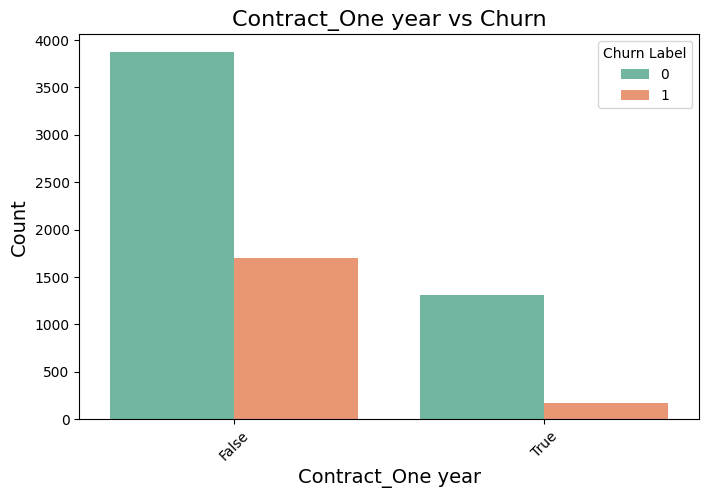

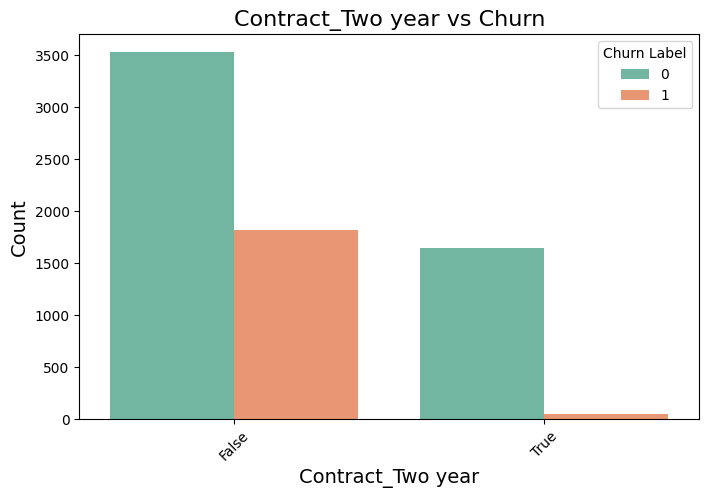

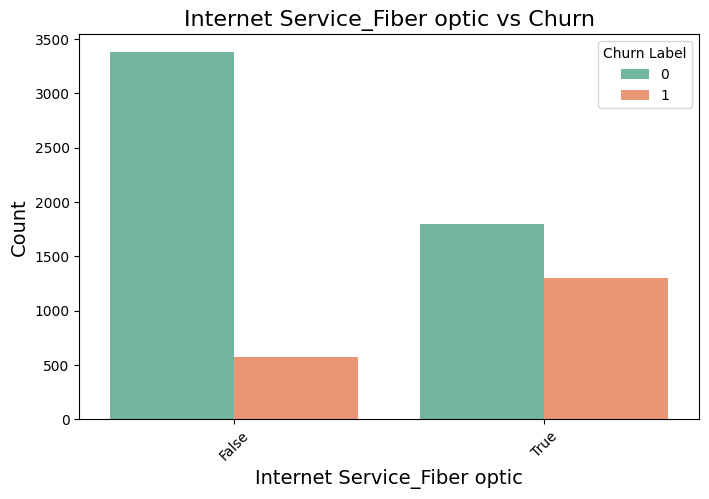

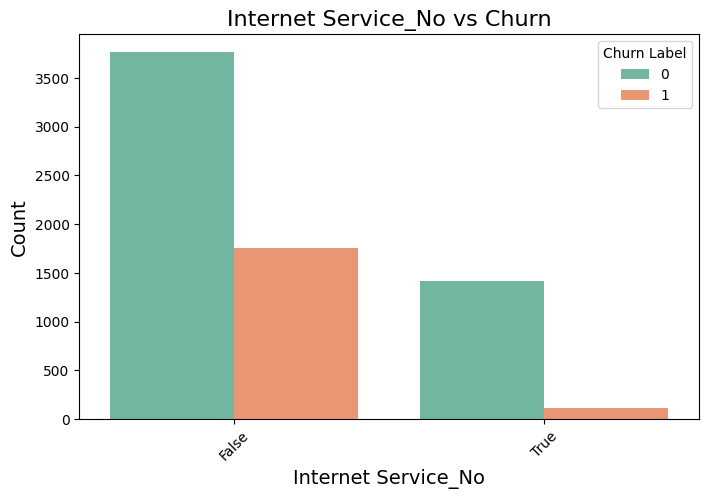

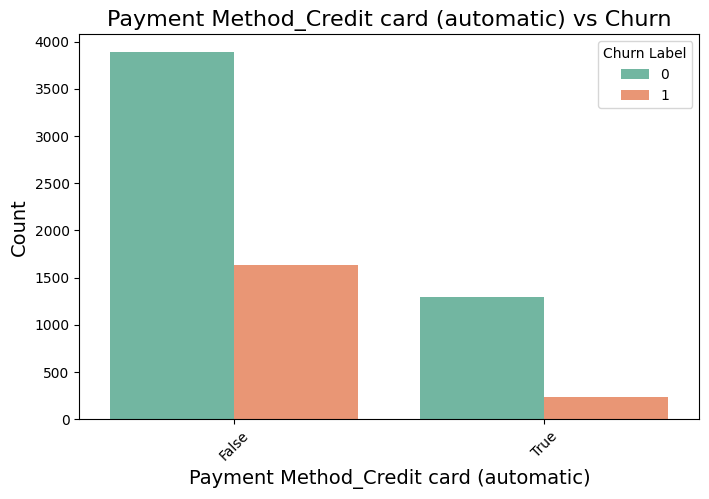

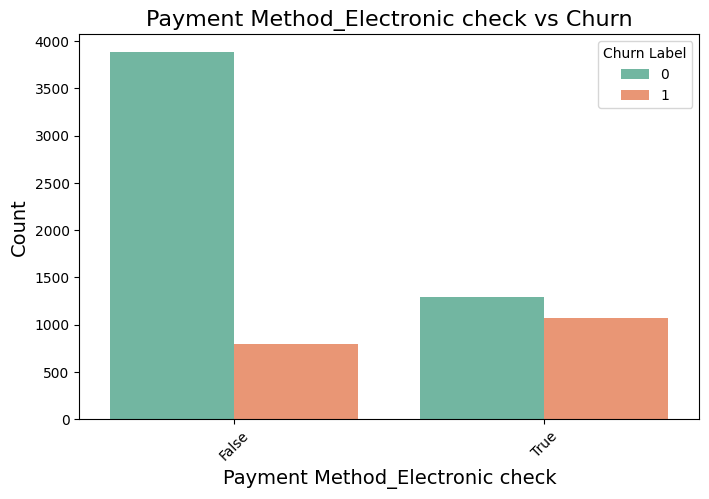

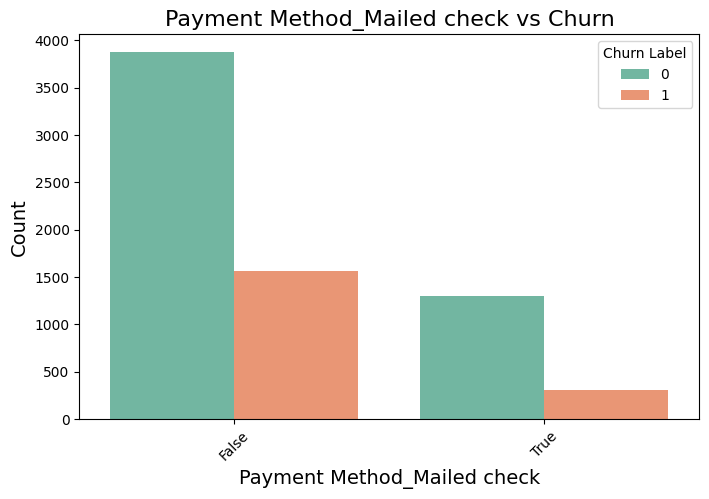

In [47]:
# Categorical features after one-hot encoding
categorical_features = ['Contract_One year', 'Contract_Two year', 
                        'Internet Service_Fiber optic', 'Internet Service_No',
                        'Payment Method_Credit card (automatic)', 
                        'Payment Method_Electronic check', 
                        'Payment Method_Mailed check']


for feature in categorical_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x=feature, hue='Churn Label', data=df, palette='Set2')
    plt.title(f'{feature} vs Churn', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()



1. **Contract (One Year) vs Churn**: Customers with one-year contracts show a lower churn rate compared to those without contracts, indicating that longer-term commitments are linked to customer retention.

2. **Contract (Two Year) vs Churn**: Customers with two-year contracts have even lower churn compared to one-year contracts, reinforcing that longer contracts are more effective at reducing churn.

3. **Internet Service (Fiber Optic) vs Churn**: Customers using fiber optic internet service exhibit higher churn rates, suggesting potential dissatisfaction with this service type or pricing.

4. **Internet Service (No Internet) vs Churn**: Customers without internet service have significantly lower churn rates, likely due to fewer service interactions or being satisfied with non-internet offerings.

5. **Payment Method (Credit Card Automatic) vs Churn**: Customers who use automatic credit card payments have a lower churn rate compared to those who don’t, suggesting that the convenience of automatic payments may reduce churn.

6. **Payment Method (Electronic Check) vs Churn**: Customers using electronic checks show a higher churn rate compared to other payment methods, indicating that this payment method might be less preferred or associated with higher dissatisfaction.

7. **Payment Method (Mailed Check) vs Churn**: Customers using mailed checks have a lower churn rate than those using electronic checks, but the churn rate is still notable, indicating mailed checks might still pose some inconvenience compared to autom customer churn.

**Numerical Features Distribution and Correlation**

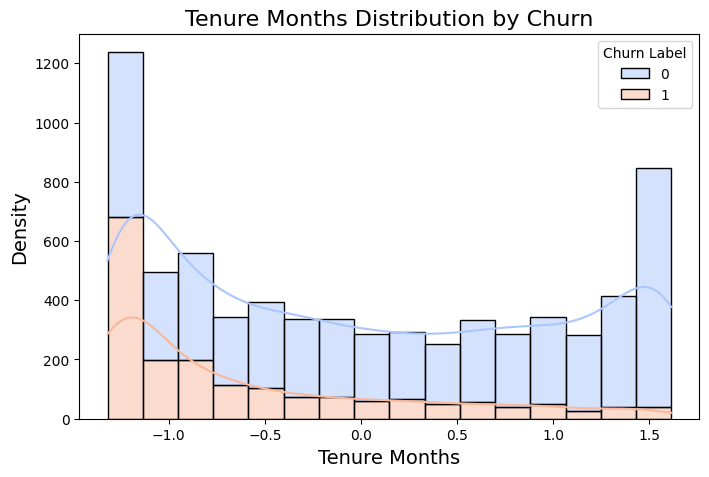

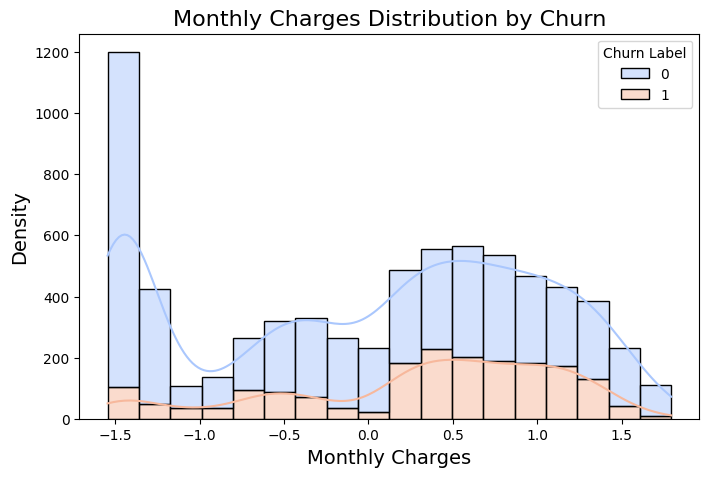

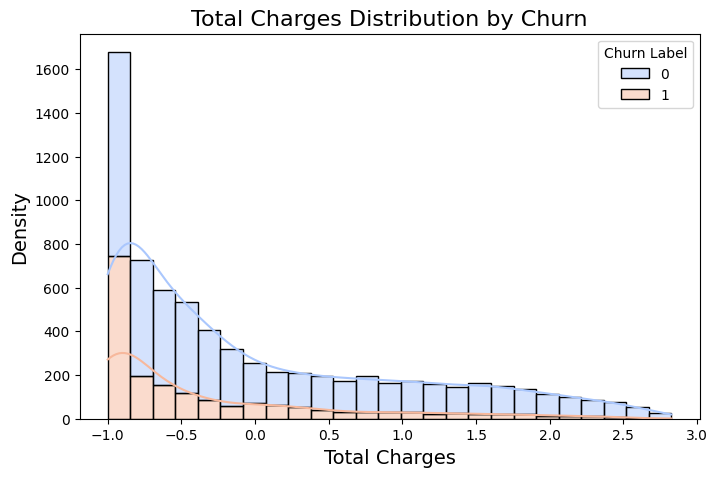

In [48]:
import warnings

# Suppress specific FutureWarnings related to pandas grouping and seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# List of numerical features to plot
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']

# Iterate over each numerical feature and plot its distribution with hue='Churn Label'
for feature in numerical_features:
    plt.figure(figsize=(8,5))
    
    # Use seaborn's histplot with 'hue' parameter for Churn Label
    sns.histplot(data=df, x=feature, hue='Churn Label', multiple="stack", palette='coolwarm', kde=True)
    
    plt.title(f'{feature} Distribution by Churn', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()


1. **Tenure Months Distribution by Churn**: Customers with shorter tenure (less time with the company) tend to churn more frequently, while those with longer tenure generally stay.

2. **Monthly Charges Distribution by Churn**: Churn is more common among customers with mid-range monthly charges, while those with lower charges are more likely to stay.

3. **Total Charges Distribution by Churn**: Customers with lower total charges are less likely to churn, but churn rates rise for customers with mid to higher total charges.

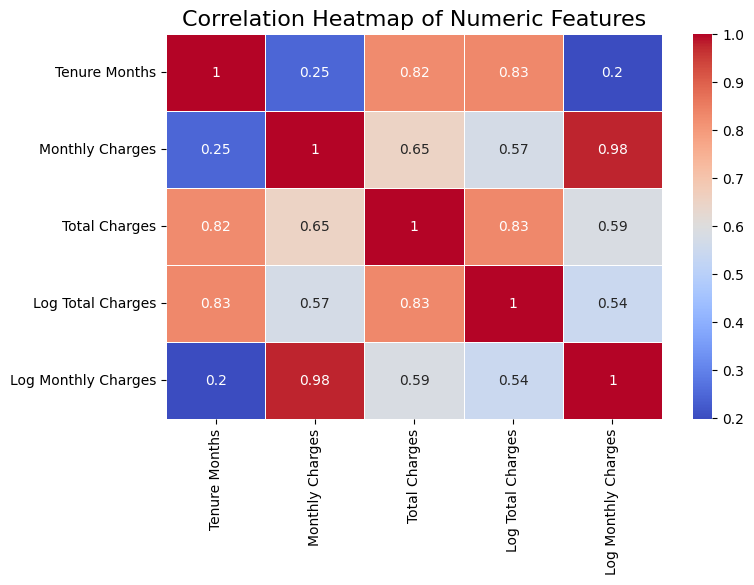

In [49]:
# Select only relevant numeric columns for correlation (excluding categorical or engineered features like "Churn Label" and "Churn Value")
numeric_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Log Total Charges', 'Log Monthly Charges']

# Create a subset of the DataFrame with only the selected numeric columns
numeric_df = df[numeric_features]

# Plot the correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()


This heatmap shows the correlations between numeric features in the dataset:

* **Tenure Months:** Strongly correlated with Total Charges (0.82) and Log Total Charges (0.83), indicating that customers who have stayed longer tend to accumulate more charges.
  
* **Monthly Charges:** Strongly correlated with Log Monthly Charges (0.98), and moderately with Total Charges (0.65), showing that customers with higher monthly payments tend to have higher overall charges.
  
* **Total Charges:** Strong correlation with Log Total Charges (0.83) and moderate correlation with Monthly Charges (0.65), indicating total charges increase with both tenure and monthly payments.
  
* **Log Total Charges:** As expected, highly correlated with Total Charges (0.83) and Tenure Months (0.83), representing a transformed version of the original Total Charges feature.
  
* **Log Monthly Charges:** Almost perfectly correlated with Monthly Charges (0.98), which is expected as it's just the log transformation of this feature.
s feature.

**Tenure and Churn Analysis**

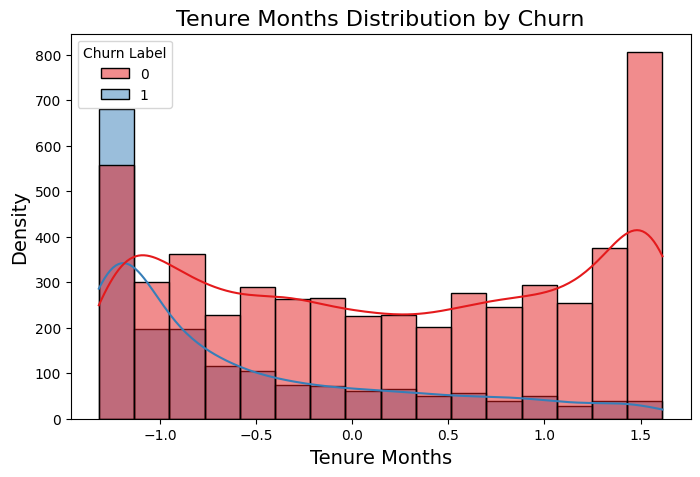

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Tenure Months', hue='Churn Label', palette='Set1', kde=True)
plt.title('Tenure Months Distribution by Churn', fontsize=16)
plt.xlabel('Tenure Months', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


Distribution summary of **Tenure Months by Churn**:


- **Churn (Label 1)** is high among customers with lower tenure (on the left side of the chart). This suggests that customers who have not stayed long are more likely to churn.
- **Churn (Label 0)**, representing customers who did not churn, is more concentrated among customers with a higher tenure (on the right). This indicates that customers who stay longer tend to remain loyal.
- The overall trend shows a decrease in churn as tenure increases, with churn being very low for customers who have been with the company the longest.

# Model Training

In [51]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

**Further Data Preparation and Preprocessing for training**

In [52]:

# Define target (y) and features (X) from the preprocessed DataFrame
X = df.drop(['Churn Value', 'Churn Label'], axis=1)  # Features
y = df['Churn Value']  # Target variable

# Ensure that the categorical feature list includes all relevant features
categorical_features = [col for col in X.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']

# Handle missing values for categorical features and convert to string for compatibility
for feature in categorical_features:
    # If the column is categorical, add 'Unknown' as a category
    if X[feature].dtype.name == 'category':
        X[feature] = X[feature].cat.add_categories('Unknown')
    # Fill missing values with 'Unknown'
    X[feature] = X[feature].fillna('Unknown')
    # Convert to string for compatibility with LabelEncoder and CatBoost
    X[feature] = X[feature].astype(str)

# Encode categorical features using LabelEncoder (to work with SMOTE)
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**SMOTE to Handle Class Imbalance**

In [53]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


**CatBoost Model**

In [54]:
# Initialize the CatBoost model with tuned hyperparameters
catboost_model = CatBoostClassifier(
    iterations=500,                  # Number of boosting iterations
    learning_rate=0.005,             # Learning rate optimized for this task
    depth=6,                         # Tree depth for each iteration
    eval_metric='AUC',               # Evaluation metric
    random_seed=42,                  # Set random seed for reproducibility
    early_stopping_rounds=50,        # Early stopping to prevent overfitting
    verbose=100                      # Show progress every 100 iterations
)

# Train the CatBoost model
catboost_model.fit(
    X_train_smote, y_train_smote, 
    cat_features=categorical_features,  # CatBoost handles categorical features directly
    eval_set=(X_test, y_test),          # Evaluation on the test set
    verbose=100,                        # Show training progress
    plot=True                           # Plot the learning curve
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8020073	best: 0.8020073 (0)	total: 10.5ms	remaining: 5.25s
100:	test: 0.8420264	best: 0.8420264 (100)	total: 949ms	remaining: 3.75s
200:	test: 0.8454688	best: 0.8454688 (200)	total: 1.9s	remaining: 2.82s
300:	test: 0.8475936	best: 0.8475936 (300)	total: 2.87s	remaining: 1.9s
400:	test: 0.8494614	best: 0.8494614 (400)	total: 3.89s	remaining: 960ms
499:	test: 0.8503798	best: 0.8504185 (497)	total: 4.91s	remaining: 0us

bestTest = 0.8504185073
bestIteration = 497

Shrink model to first 498 iterations.


# Model Testing and Evaluation

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, roc_auc_score

In [56]:
# Predictions
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]  # Probability predictions for AUC



threshold = 0.4  # Based on the need for High recall
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Calculate accuracy, precision, recall, and F1 score
accuracy= accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.7303
Precision: 0.4953
Recall: 0.8396
F1 Score: 0.6230
AUC-ROC: 0.8504


* **Accuracy: 0.7303:** This means that about 73% of the model's predictions are correct. While this isn't very high, accuracy alone isn't the most important metric in an imbalanced dataset like customer churn, where recall might be more critical.

* **Precision: 0.4953:** With a precision of around 50%, this means that half of the customers the model predicts to churn actually don’t. However, in churn prediction, it's more important to catch potential churners (even with some false positives), so a lower precision is acceptable in this context.

* **Recall: 0.8396:** The recall is strong at about 84%, indicating that the model successfully identifies most customers likely to churn. This is critical in a business context, as missing churners can lead to significant revenue loss, making high recall desirable.

* **F1 Score: 0.6230:** The F1 score, which balances precision and recall, shows that the model is making a reasonable trade-off between the two. In churn prediction, it makes sense to prioritize recall over precision, so this F1 score reflects the model's balanced approach.

* **AUC-ROC: 0.8504**: An AUC-ROC score of 0.85 indicates that the model is good at distinguishing between customers who churn and those who don’t. This high score suggests the model is well-suited for the task, providing a reliable assessment of churn risk.

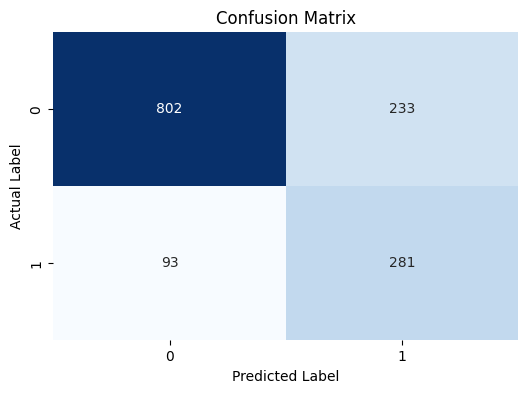

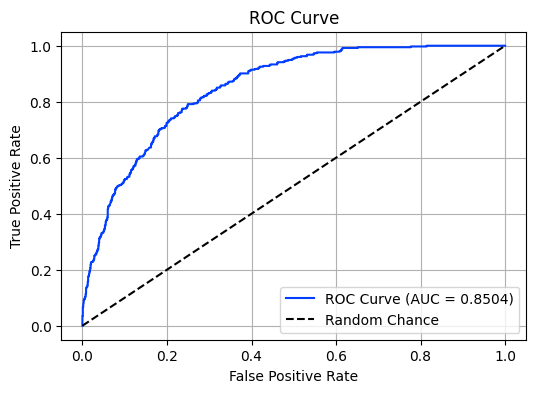

In [57]:
# Visualization of Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Visualization of ROC Curve
def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_roc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Call the visualizations after model evaluation
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred_proba)


1. **Confusion Matrix**: The model correctly predicted **802 customers** as not churned, but **233 customers** were incorrectly predicted as churned even though they did not churn, while **281 churned customers** were correctly identified, but **93 churned customers** were missed.

2. **ROC Curve**: The **AUC score of 0.8504** indicates that the model has a good ability to distinguish between customers who churn and those who don’t, with the curve showing a high true positive rate for various false positive rates.

**Note:** The business goal prioritizes capturing as many churners as possible (high recall) rather than minimizing false positives.

In [58]:
import joblib

# Save the trained CatBoost model for deployment
model_filename = 'customer_churn_prediction_model.cbm'
joblib.dump(catboost_model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as customer_churn_prediction_model.cbm
